Quantidade de atendimentos por municpio

In [77]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import pandas as pd
import gender_guesser as gender

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('DADOS.txt', delimiter=',', encoding='utf-8')

df.head()
ocorrencia_municipio = df['MUNICÍPIO'].value_counts()
print(ocorrencia_municipio)

MUNICÍPIO
FORTALEZA                                                                                               9364
ITAPIPOCA                                                                                               7620
JUAZEIRO DO NORTE                                                                                       4495
MARACANAÚ                                                                                               4403
TRAIRI                                                                                                  4377
                                                                                                        ... 
ITAIÇABA                                                                                                 114
SÃO JOÃO DO JAGUARIBE                                                                                    111
GRANJEIRO                                                                                                 96
DEPUTADO 

Index(['ID', 'MUNICÍPIO', 'PRIMEIRO_NOME'], dtype='object')


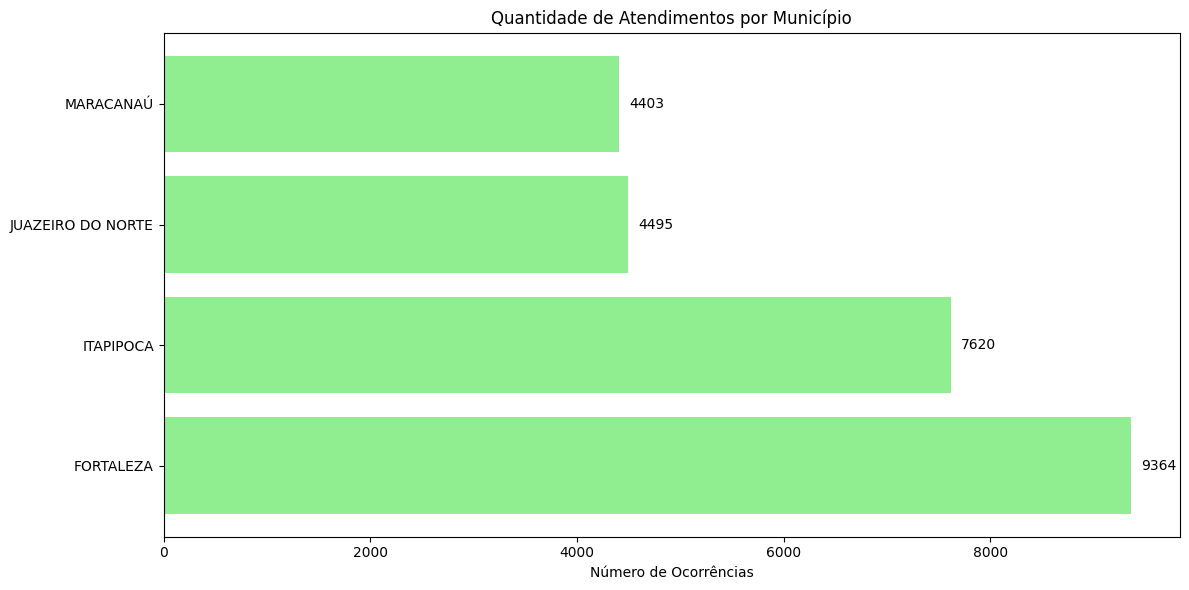

In [5]:
df = pd.read_csv('DADOS.txt', encoding='UTF-8', sep=',')
print(df.columns)

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Municípios escolhidos para análise
municipios_interesse = ['FORTALEZA', 'ITAPIPOCA', 'JUAZEIRO DO NORTE', 'MARACANAÚ']

df_municipios = df[df['MUNICÍPIO'].str.strip().isin(municipios_interesse)]

municipio_count = df_municipios.groupby('MUNICÍPIO').size()

plt.figure(figsize=(12, 6))
bars = plt.barh(municipio_count.index, municipio_count.values, color='lightgreen')

# Exibindo os valores nas barras
for bar in bars:
    xval = bar.get_width()  # Para gráfico horizontal, usamos a largura
    plt.text(xval + 100, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')

plt.yticks(ticks=[bar.get_y() + bar.get_height() / 2 for bar in bars], labels=municipio_count.index)

plt.title('Quantidade de Atendimentos por Município')
plt.xlabel('Número de Ocorrências')
# plt.ylabel('Município')  # Não precisamos do rótulo, pois os nomes já estão no eixo Y
plt.tight_layout()
plt.show()


Aproximação quantidade de homens e mulheres


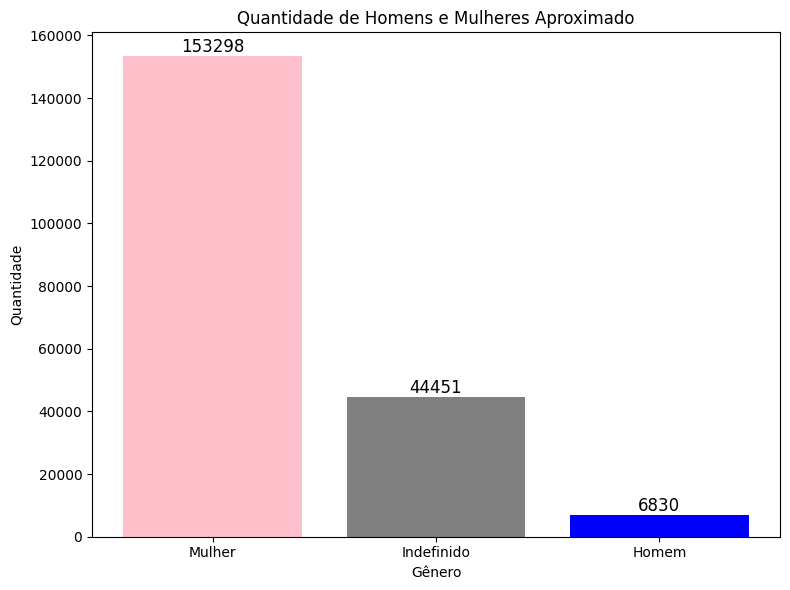

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('DADOS.txt', encoding='UTF-8', sep=',')

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

def determinar_genero(nome):
    if isinstance(nome, str):  
        nome = nome.strip().upper()  
        if nome.endswith('O'):
            return 'Homem'
        elif nome.endswith('A'):
            return 'Mulher'
        else:
            return 'Indefinido'
    return 'Indefinido'  

df['GENERO'] = df['PRIMEIRO_NOME'].apply(determinar_genero)

genero_count = df['GENERO'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(genero_count.index, genero_count.values, color=['pink', 'gray', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Quantidade de Homens e Mulheres Aproximado')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.tight_layout()

plt.show()


Porcentagem em relação a população total


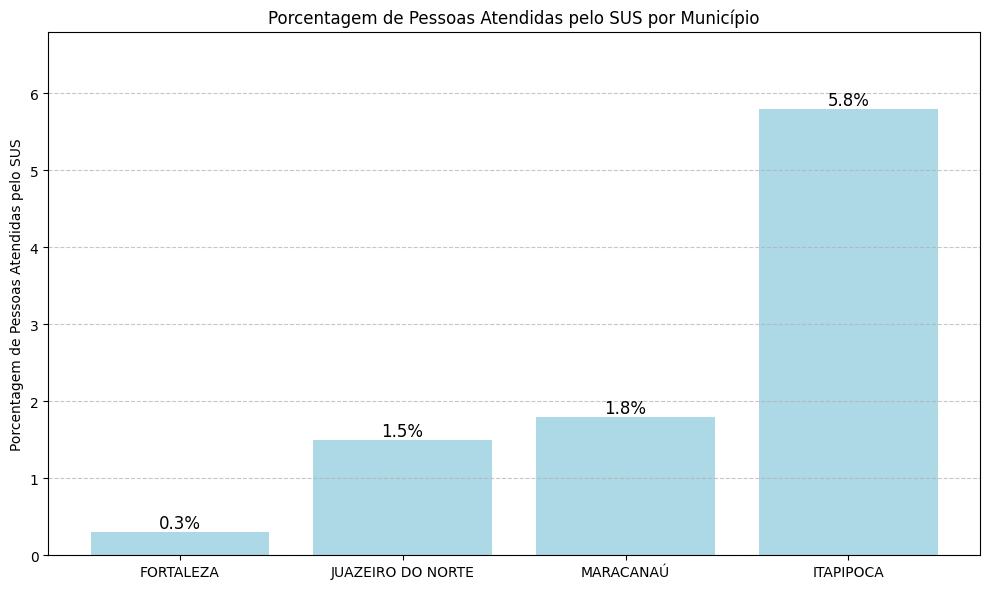

In [4]:
import matplotlib.pyplot as plt

municipios = ['FORTALEZA', 'JUAZEIRO DO NORTE', 'MARACANAÚ', 'ITAPIPOCA']
porcentagens = [0.3, 1.5, 1.8, 5.8] #porcentagem calculada a parte

plt.figure(figsize=(10, 6))
bars = plt.bar(municipios, porcentagens, color='lightblue')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12)

plt.ylabel('Porcentagem de Pessoas Atendidas pelo SUS')
plt.title('Porcentagem de Pessoas Atendidas pelo SUS por Município')
plt.ylim(0, max(porcentagens) + 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


PIB por municipio

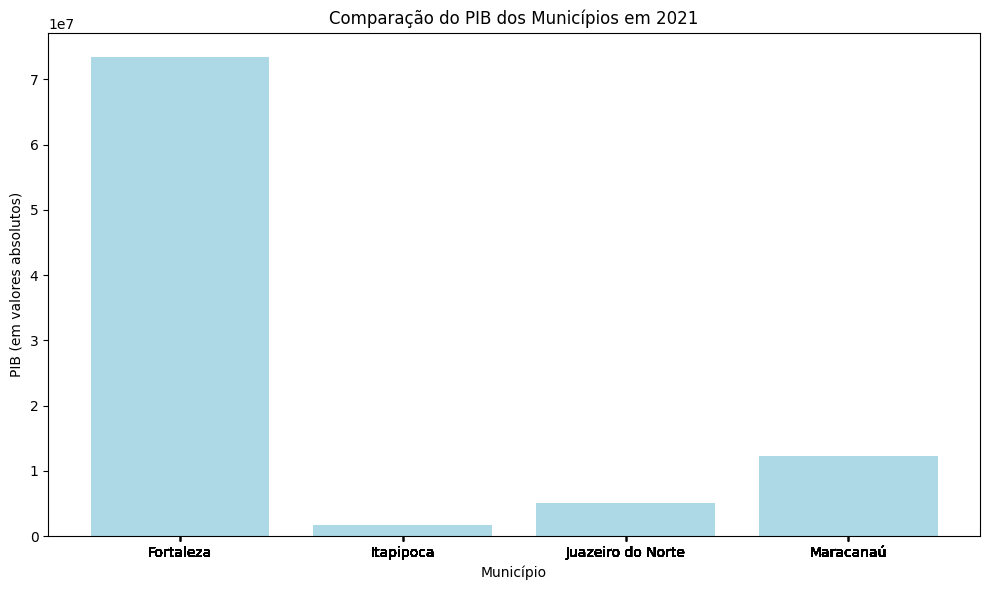

In [83]:
df = pd.read_csv('Produto Interno Bruto dos Municípios.csv', encoding='UTF-8', sep=',')

municipios_interesse = ['Fortaleza', 'Itapipoca', 'Juazeiro do Norte', 'Maracanaú'] # mesmos municpios do exemplo anterior

df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]

df_municipios = df_municipios[['Localidade', '2021']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios['Localidade'], df_municipios['2021'], color='lightblue')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios['Localidade'], ha='center')

plt.title('Comparação do PIB dos Municípios em 2021')
plt.ylabel('PIB (em valores absolutos)')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


Porcentagem do pib com as pessoas atendidas


ValueError: cannot convert float NaN to integer

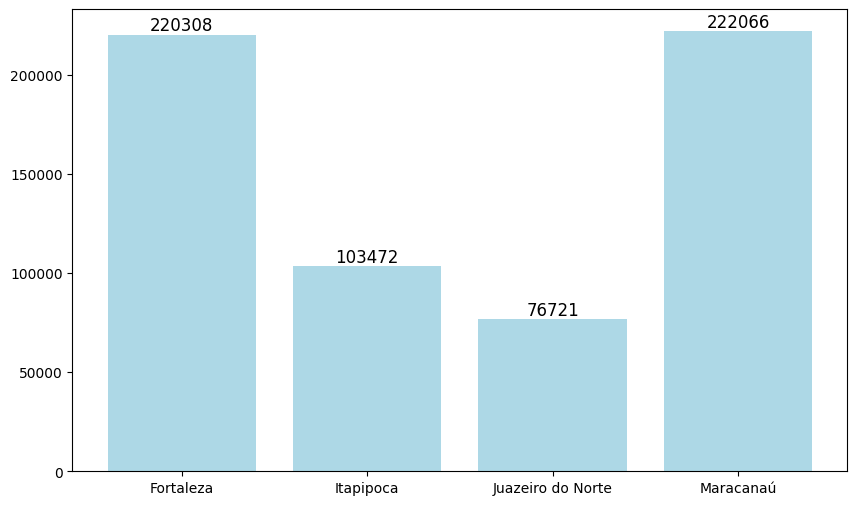

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Produto Interno Bruto dos Municípios.csv', encoding='UTF-8', sep=',')

municipios_interesse = ['Fortaleza', 'Itapipoca', 'Juazeiro do Norte', 'Maracanaú']

df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]

df_municipios = df_municipios[['Localidade', '2021']]

percentuais = {
    'Fortaleza': 0.3 / 100,           
    'Juazeiro do Norte': 1.5 / 100,   
    'Maracanaú': 1.8 / 100,           
    'Itapipoca': 5.8 / 100           
}

df_municipios['PIB Percentual'] = df_municipios.apply(lambda row: row['2021'] * percentuais[row['Localidade']], axis=1)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios['Localidade'], df_municipios['PIB Percentual'], color='lightblue')

for bar, valor in zip(bars, df_municipios['PIB Percentual']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(valor)}', ha='center', va='bottom', fontsize=12)

plt.title('Percentual do PIB Atendido pelo SUS em 2021 por Município')
plt.ylabel('Valor (em PIB calculado)')
plt.xlabel('Município')
plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios['Localidade'], ha='center')

plt.tight_layout()
plt.show()


Taxa de escolaridade por municipio

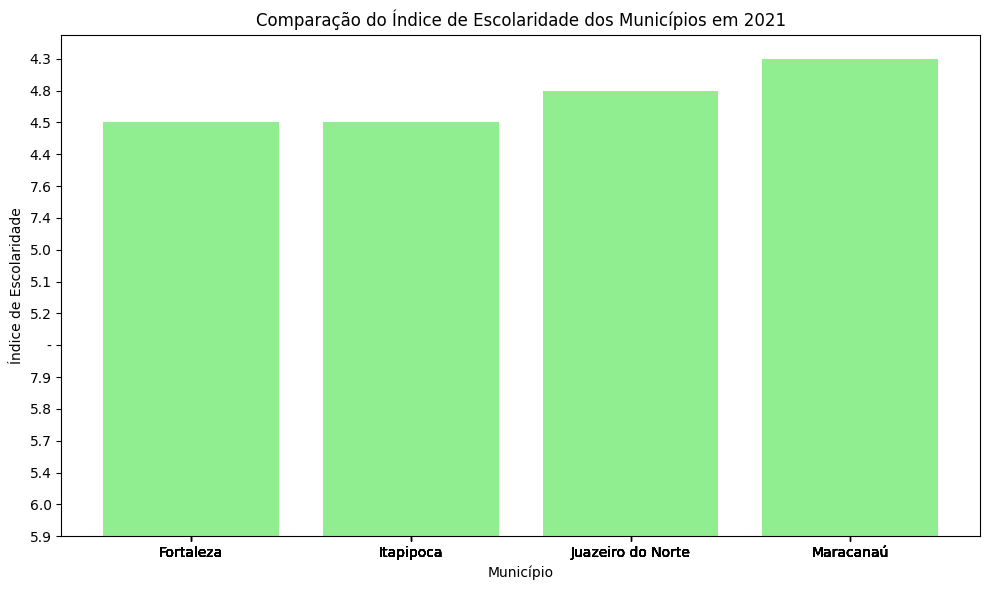

In [84]:
df = pd.read_csv('Índice de Desenvolvimento da Educação Básica.csv', encoding='UTF-8', sep=',')
#print(df.columns)

municipios_interesse = ['Fortaleza', 'Itapipoca', 'Juazeiro do Norte', 'Maracanaú']

df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]
df_municipios_ano = df_municipios[['Localidade', '2021']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios_ano['Localidade'], df_municipios_ano['2021'], color='lightgreen')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios_ano['Localidade'], ha='center')

plt.title('Comparação do Índice de Escolaridade dos Municípios em 2021')
plt.ylabel('Índice de Escolaridade')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


Grafico 3:  Raça x número de acidentes 

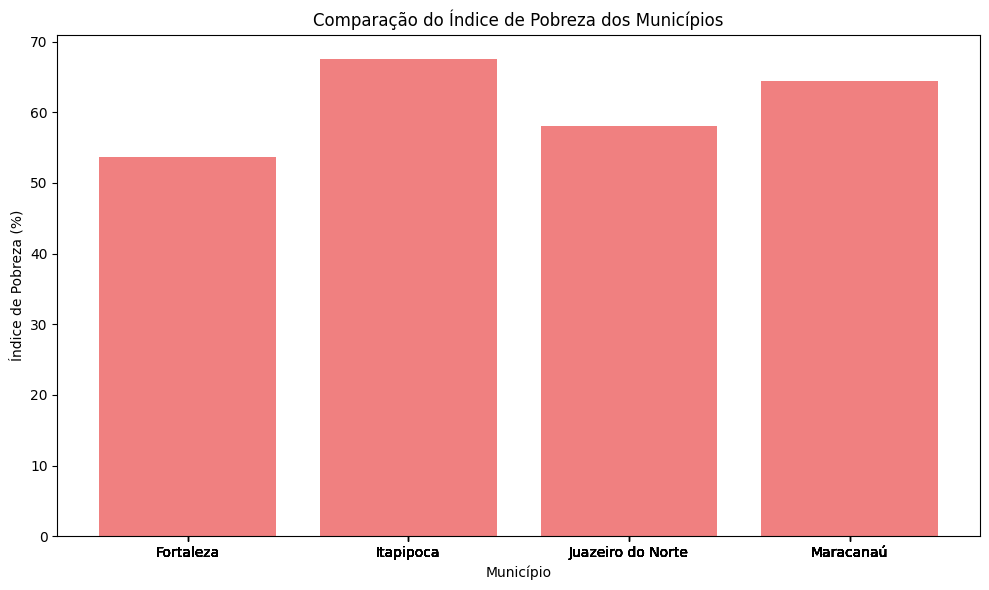

In [81]:
df = pd.read_csv('Mapa de pobreza e desigualdade.csv', encoding='UTF-8', sep=',')

municipios_interesse = ['Fortaleza', 'Itapipoca', 'Juazeiro do Norte', 'Maracanaú']
df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]
df_municipios_ano = df_municipios[['Localidade', '2003']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios['Localidade'], df_municipios_ano['2003'], color='lightcoral')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios['Localidade'], ha='center')

plt.title('Comparação do Índice de Pobreza dos Municípios')
plt.ylabel('Índice de Pobreza (%)')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7892\846078365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipios_2021['2021'] = pd.to_numeric(df_municipios_2021['2021'], errors='coerce')


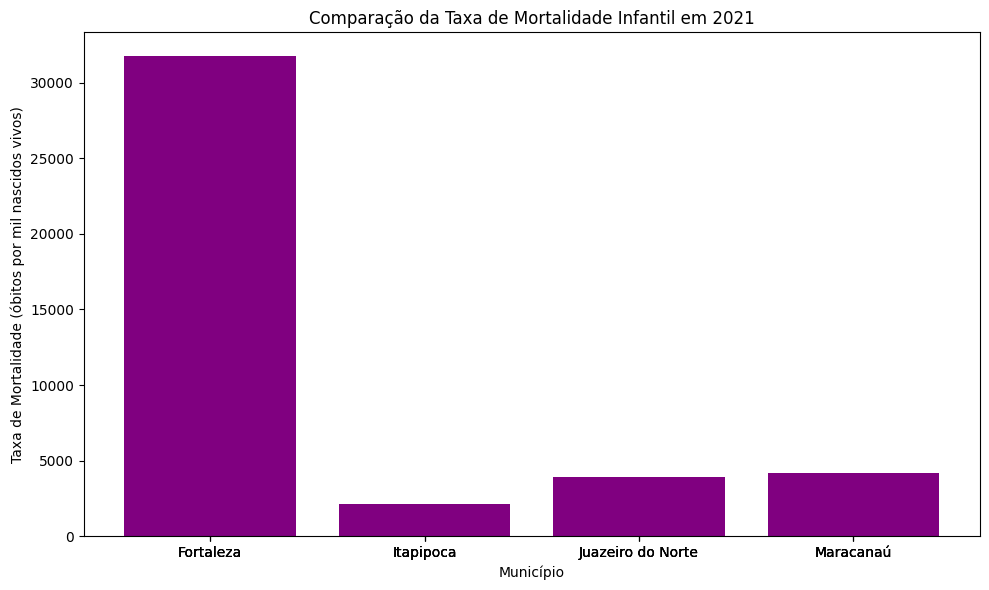

In [82]:
df = pd.read_csv('Taxa de mortalidade infantil.csv', encoding='UTF-8', sep=',')

df['Localidade'] = df['Localidade'].str.strip()

municipios_interesse = ['Fortaleza', 'Itapipoca', 'Juazeiro do Norte', 'Maracanaú']
df_municipios = df[df['Localidade'].isin(municipios_interesse)]

df_municipios_2021 = df_municipios[['Localidade', '2021']]

df_municipios_2021['2021'] = pd.to_numeric(df_municipios_2021['2021'], errors='coerce')

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios_2021['Localidade'], df_municipios_2021['2021'], color='purple')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios_2021['Localidade'], ha='center')

plt.title('Comparação da Taxa de Mortalidade Infantil em 2021')
plt.ylabel('Taxa de Mortalidade (óbitos por mil nascidos vivos)')
plt.xlabel('Município')

plt.tight_layout()
plt.show()